In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/home/subaru/ML-Projects/ML-Projects/Mall_Customers/data/Mall_Customers.csv')

In [4]:
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
data.drop(columns=['CustomerID'], inplace=True)

In [6]:
data['Genre'] = data['Genre'].map({'Male': 0, 'Female': 1})

In [7]:
data.drop(columns=['Genre'], inplace=True)

In [8]:
scaler = StandardScaler()

In [9]:
X_scaled = scaler.fit_transform(data)

In [10]:
inertia = []
silhouette = []
K = range(2, 11)

In [11]:
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, labels))

Text(0.5, 1.0, 'Elbow Method')

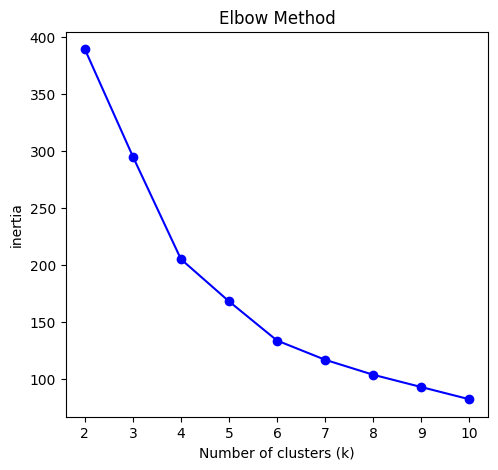

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("inertia")
plt.title("Elbow Method")

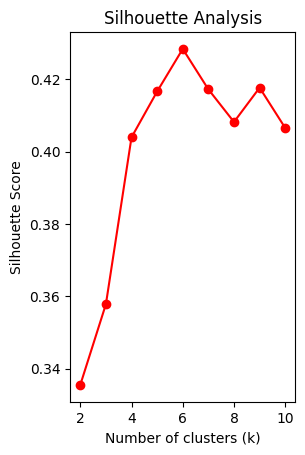

In [13]:
plt.subplot(1,2,2)
plt.plot(K, silhouette, 'ro-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

In [37]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')

In [38]:
kmeans.fit(X_scaled)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [39]:
labels = kmeans.labels_

In [40]:
data['Cluster'] = labels

In [41]:
cluster_summary = data.groupby("Cluster").mean()

In [42]:
cluster_summary

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.275862,47.620690,41.706897
1,32.875000,86.100000,81.525000
2,25.769231,26.115385,74.846154
3,26.733333,54.311111,40.911111
4,44.387097,89.774194,18.483871


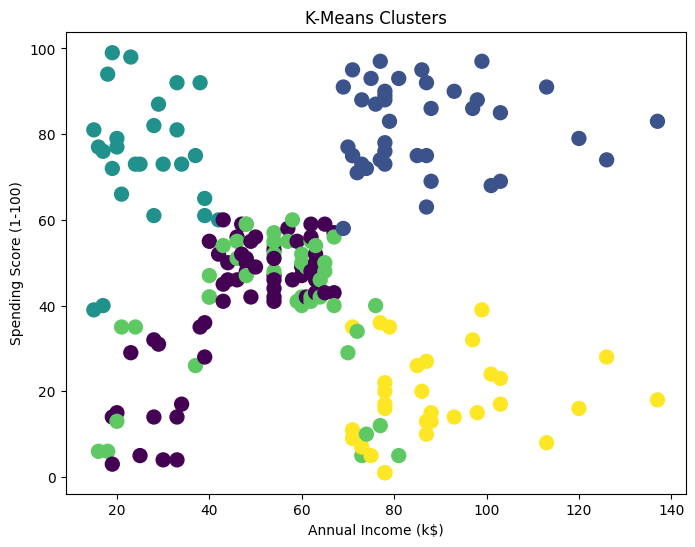

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"], c=data["Cluster"], cmap="viridis", s=100)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clusters")
plt.show()
